<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/2203a52117/blob/main/capston_project(statml).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/heart (1).csv")
print(data)
print('-----------------------------------------------------------------------------------------------------------------')
x=data.drop(columns=['HeartDisease'],axis=1)
y=data['HeartDisease']
data['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
data['ChestPainType'].replace({'ATA': 0, 'NAP': 1,'ASY':2,'TA':3}, inplace=True)
data['RestingECG'].replace({'Normal': 0, 'ST': 1,'LVH':2}, inplace=True)
data['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace=True)
data['ST_Slope'].replace({'Up': 0, 'Flat': 1,'Down':2}, inplace=True)
print(data.head())


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

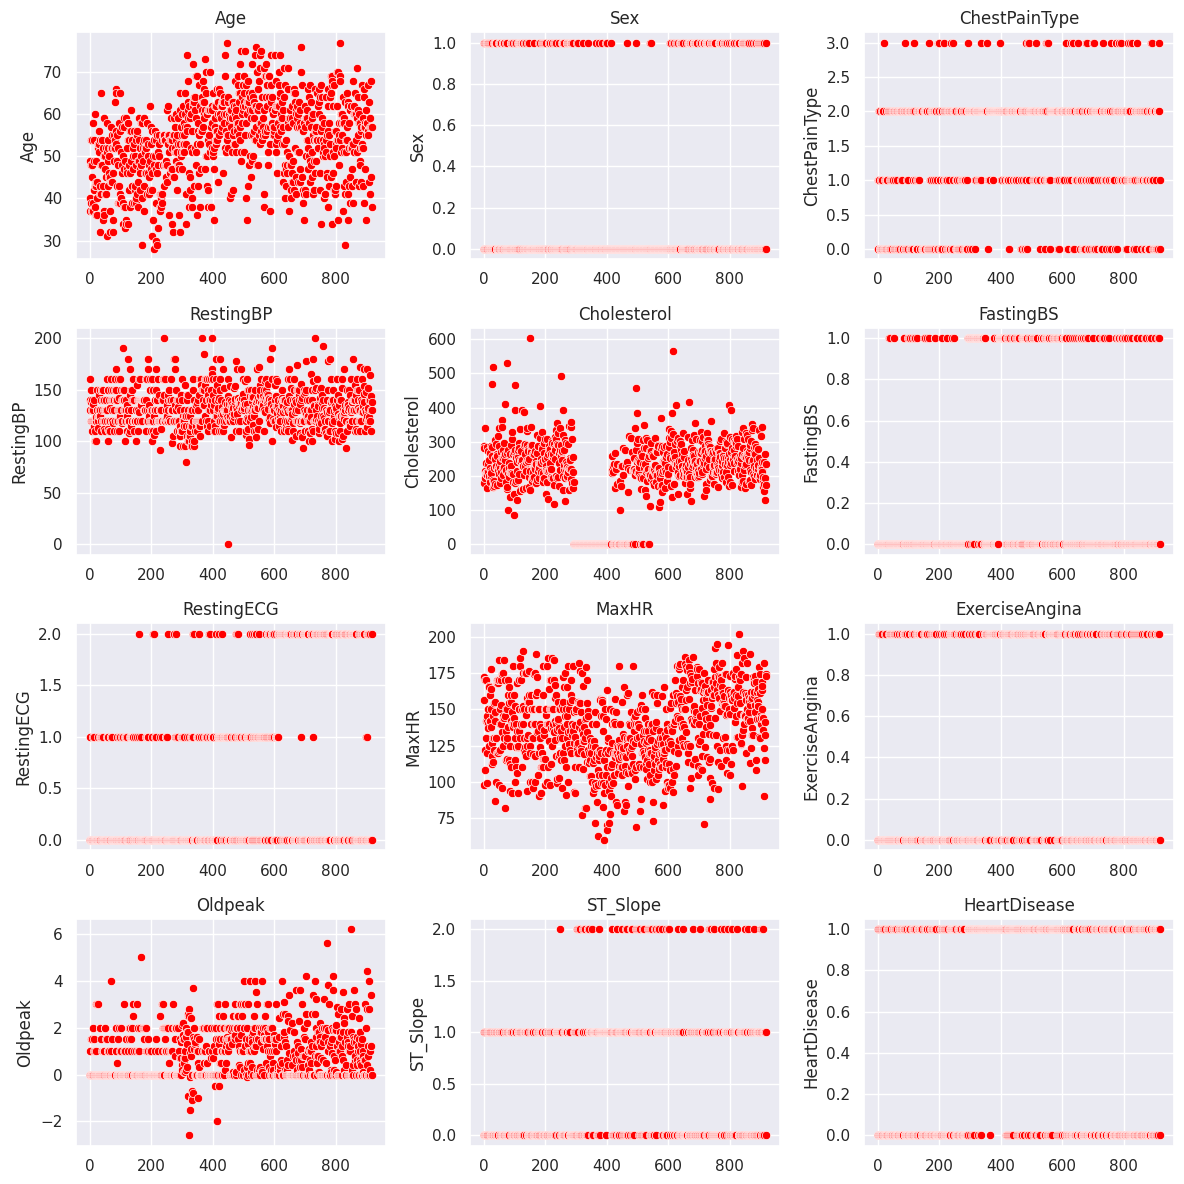

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [80]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()
data.head()
data.describe()
num_cols = len(data.columns)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    ax = axes[i]
    sns.scatterplot(data[column], ax=ax, color = "red")
    ax.set_title(column)

for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
x=data.drop(columns='HeartDisease',axis=1)
y=data['HeartDisease']
print(x)
print(y)
scalar=MinMaxScaler()#normalized
scalar.fit(x)
x_scaled=scalar.transform(x)
print(x_scaled)
features=x_scaled
target=data['HeartDisease']
print(features)
print(target)




In [88]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=20)
print(x_train.shape,x_test.shape)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

(734, 11) (184, 11)
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        85
           1       0.84      0.91      0.87        99

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



In [87]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
perceptron_model = Perceptron()
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=20)
perceptron_model.fit(x_train, y_train)
y_pred = perceptron_model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

[1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0]
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        46
           1       0.88      0.76      0.81        46

    accuracy                           0.83        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.83      0.83      0.83        92



In [86]:
def logistic_regression(data):
    data = data.fillna(data.mean())
    if data['HeartDisease'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)
    logistic_reg = LogisticRegression()
    logistic_reg.fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
logistic_regression(data)


Accuracy: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        75
           1       0.88      0.92      0.90       109

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



In [76]:
import numpy as np
import pandas as pd
import random as rd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
def step_function(features):
  return 1 if features > 0 else 0

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
num_features = x_train.shape[1]
w = np.zeros(num_features)
bias = 0
weights= w.astype(int)

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000
# Training the logistic regression model
for _ in range(num_iterations):
    # Forward propagation
    z = np.dot(x_train,weights) +int(bias)
    a = sigmoid(z)

    # Calculate the cost (cross-entropy loss)
    cost = -np.mean(y_train * np.log(a) + (1 - y_train) * np.log(1 - a))

    # Compute gradients
    dw = np.dot(x_train.T, (a - y_train)) / len(y_train)
    db = np.sum(a - y_train) / len(y_train)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

# Make predictions on the test data
def predict(x_test, weights, bias):
    z = np.dot(x_test, weights) + bias
    a = sigmoid(z)
    return (a > 0.5).astype(int)

y_pred = predict(x_test, weights, bias)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

TypeError: ignored